In [1]:
#!pip install simfin

In [2]:
import pandas as pd
import simfin as sf
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

## API Settings

In [3]:
# Set your API-key for downloading data. 'free' key gets the free data (1 year old).
sf.set_api_key('free')

# Set the local directory where data-files are stored.
# The directory will be created if it does not already exist.
sf.set_data_dir('/Users/lukebetham/Documents/simfin_data')

#Region - Can currently be USA ('us') or Germany ('de')
region='us'

## Company id/name data

In [4]:
df_name = sf.load_companies(market=region)
df_name

Dataset "us-companies" on disk (4 days old).
- Loading from disk ... Done!


,SimFinId,Company Name,IndustryId
Ticker,,,
A,45846,AGILENT TECHNOLOGIES INC,106001.0
AA,367153,Alcoa Corp,110004.0
AAC_delist,939324,"AAC Holdings, Inc.",106011.0
AAL,68568,American Airlines Group Inc.,100006.0
AAMC,847094,Altisource Asset Management Corp,104001.0
...,...,...,...
ZUMZ,45730,Zumiez Inc,103002.0
ZUO,994625,ZUORA INC,NaN
ZVO,901866,Zovio Inc,102006.0


## Industry Ids

In [5]:
df_industry = sf.load_industries()

Dataset "industries" on disk (4 days old).
- Loading from disk ... Done!


In [6]:
df_industry

,Sector,Industry
IndustryId,,
100001,Industrials,Industrial Products
100002,Industrials,Business Services
100003,Industrials,Engineering & Construction
100004,Industrials,Waste Management
100005,Industrials,Industrial Distribution
...,...,...
110004,Basic Materials,Metals & Mining
110005,Basic Materials,Building Materials
110006,Basic Materials,Coal


## Earnings data - Income Statement

In [7]:
# Download the data from the SimFin server and load into a Pandas DataFrame.
df_earnings = sf.load_income(variant='quarterly', market=region)
df_earnings.columns

Dataset "us-income-quarterly" on disk (4 days old).
- Loading from disk ... Done!


Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)', 'Revenue',
       'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

In [8]:
df_earnings.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2010-07-31     2011-09-07     347000000.0       352000000.0   
       2010-10-31     2012-12-20     344000000.0       356000000.0   
       2011-01-31     2012-03-05     347000000.0       355000000.0   
       2011-04-30     2012-06-04     347000000.0       355000000.0   
       2011-07-31     2012-09-05     348000000.0       357000000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2010-07-31   1.384000e+09     -659000000.0  ...   
       2010-10-31   1.576000e+09     -742000000.0  ...   
       2011-01-31   1.519000e+09     -703000000.0  ...   
       2011-04-30   1.677000e+09     -777000000.0  ...   
       2011-07-31   1.691000e+09     -799000000.0  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2010-07-31                   -15000000.0            -21000000.0   
       2010-10-31                    35000000.0            -16000000.0   
       2011-01-31                   -13000000.0            -19000000.0   
       2011-04-30                    -6000000.0            -17000000.0   
       2011-07-31                           0.0            -17000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2010-07-31                    100000000              127000000.0   
       2010-10-31                    238000000                5000000.0   
       2011-01-31                    198000000                      NaN   
       2011-04-30                    260000000                      NaN   
       2011-07-31                    281000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
A      2010-07-31              227000000                        -22000000.0   
       2010-10-31              243000000                         49000000.0   
       2011-01-31              198000000                         -5000000.0   
       2011-04-30              260000000                        -60000000.0   
       2011-07-31              281000000                         49000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2010-07-31                                  205000000   
       2010-10-31                                  292000000   
       2011-01-31                                  193000000   
       2011-04-30                                  200000000   
       2011-07-31                                  330000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2010-07-31                                NaN   205000000   
       2010-10-31                                NaN   292000000   
       2011-01-31                                NaN   193000000   
       2011-04-30                                NaN   200000000   
       2011-07-31                                NaN   330000000   

                    Net Incom

## Balance Sheet data

In [9]:
df_bs = sf.load_balance(variant='quarterly', market=region)
df_bs.columns

Dataset "us-balance-quarterly" on disk (4 days old).
- Loading from disk ... Done!


Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')

## Cashflow data

In [10]:
df_cash = sf.load_cashflow(variant='quarterly', market=region)
df_cash.columns

Dataset "us-cashflow-quarterly" on disk (4 days old).
- Loading from disk ... Done!


Index(['SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Net Income/Starting Line', 'Depreciation & Amortization',
       'Non-Cash Items', 'Change in Working Capital',
       'Change in Accounts Receivable', 'Change in Inventories',
       'Change in Accounts Payable', 'Change in Other',
       'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Change in Long Term Investment',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Dividends Paid',
       'Cash from (Repayment of) Debt', 'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Change in Cash'],
      dtype='object')

## Share Prices

In [11]:
df_p = sf.load_shareprices(variant='daily', market='us')
print(df_p.shape)
df_p.columns


Dataset "us-shareprices-daily" on disk (4 days old).
- Loading from disk ... Done!
(6027126, 9)


Index(['SimFinId', 'Open', 'Low', 'High', 'Close', 'Adj. Close', 'Dividend',
       'Volume', 'Shares Outstanding'],
      dtype='object')

## Industry averages

In [12]:
df_all = pd.merge(df_name,df_industry,'left',left_on='IndustryId',right_index=True)

In [13]:
df_all.head()

,SimFinId,Company Name,IndustryId,Sector,Industry
Ticker,,,,,
A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research
AA,367153,Alcoa Corp,110004.0,Basic Materials,Metals & Mining
AAC_delist,939324,"AAC Holdings, Inc.",106011.0,Healthcare,Health Care Providers
AAL,68568,American Airlines Group Inc.,100006.0,Industrials,Airlines
AAMC,847094,Altisource Asset Management Corp,104001.0,Financial Services,Asset Management


In [14]:
resample_annual = df_p.loc['A'].resample('A-JUN').last()
resample_pct = resample_annual['Close'].pct_change()
market_cap = resample_annual['Close']*resample_annual['Shares Outstanding']
market_cap.diff()

Date
2007-06-30             NaN
2008-06-30             NaN
2009-06-30             NaN
2010-06-30             NaN
2011-06-30    7.890802e+09
2012-06-30    5.519973e+09
2013-06-30    2.304680e+09
2014-06-30    9.137960e+09
2015-06-30   -2.189666e+10
2016-06-30    1.585605e+09
2017-06-30    4.618381e+09
2018-06-30    7.273157e+08
2019-06-30    3.809384e+09
2020-06-30    3.691435e+09
Freq: A-JUN, dtype: float64

In [18]:
stock_price_change_list_2018 = []
stock_price_change_list_2019 = []
stock_price_change_list_2020 = []
market_cap_list = []
market_cap_change_2020_list = []

for ticker_code in tqdm(df_all.index):
    try:
        resample_annual = df_p.loc[ticker_code].resample('A-JUN').last()
        resample_pct = resample_annual['Close'].pct_change()
        market_caps = resample_annual['Close']*resample_annual['Shares Outstanding']
        market_cap_2020 = market_caps['2020-06-30']
        market_cap_change_2020 = market_caps.diff()['2020-06-30']
        market_cap_list.append(market_cap_2020)
        market_cap_change_2020_list.append(market_cap_change_2020)
        
        try:
            stock_price_change_list_2020.append(resample_pct[f'2020-06-30'])
        except:
            stock_price_change_list_2020.append(np.nan)
        try:
            stock_price_change_list_2019.append(resample_pct[f'2019-06-30'])
        except:
            stock_price_change_list_2019.append(np.nan)
        try:
            stock_price_change_list_2018.append(resample_pct[f'2018-06-30'])
        except:
            stock_price_change_list_2018.append(np.nan)
    except:
        stock_price_change_list_2018.append(np.nan)
        stock_price_change_list_2019.append(np.nan)
        stock_price_change_list_2020.append(np.nan)
        market_cap_list.append(np.nan)
        market_cap_change_2020_list.append(np.nan)


100%|██████████| 2710/2710 [00:48<00:00, 56.25it/s]


In [25]:
df_all['price_change_jun18']= stock_price_change_list_2018
df_all['price_change_jun19']= stock_price_change_list_2019
df_all['price_change_jun20']= stock_price_change_list_2020
df_all['market_cap_jun20'] = np.array(market_cap_list)/1000000000
df_all['market_cap_jun20_change'] = np.array(market_cap_change_2020_list)/1000000000
df_all.head()

,SimFinId,Company Name,IndustryId,Sector,Industry,price_change_jun18,price_change_jun19,price_change_jun20,market_cap_jun20,market_cap_jun20_change
Ticker,,,,,,,,,,
A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,0.042657,0.207471,0.183474,27.286658,3.691435
AA,367153,Alcoa Corp,110004.0,Basic Materials,Metals & Mining,0.435835,-0.500640,-0.519863,2.089728,-2.253640
AAC_delist,939324,"AAC Holdings, Inc.",106011.0,Healthcare,Health Care Providers,NaN,NaN,NaN,NaN,NaN
AAL,68568,American Airlines Group Inc.,100006.0,Industrials,Airlines,-0.245628,-0.140938,-0.599203,6.646829,-7.859244
AAMC,847094,Altisource Asset Management Corp,104001.0,Financial Services,Asset Management,-0.236871,-0.835125,0.426087,0.026767,0.008490


In [66]:
sector_change = df_all.groupby('Sector').mean()[['price_change_jun18','price_change_jun19','price_change_jun20']]

In [67]:
sector_change_graph = sector_change.reset_index().melt(id_vars=['Sector'])

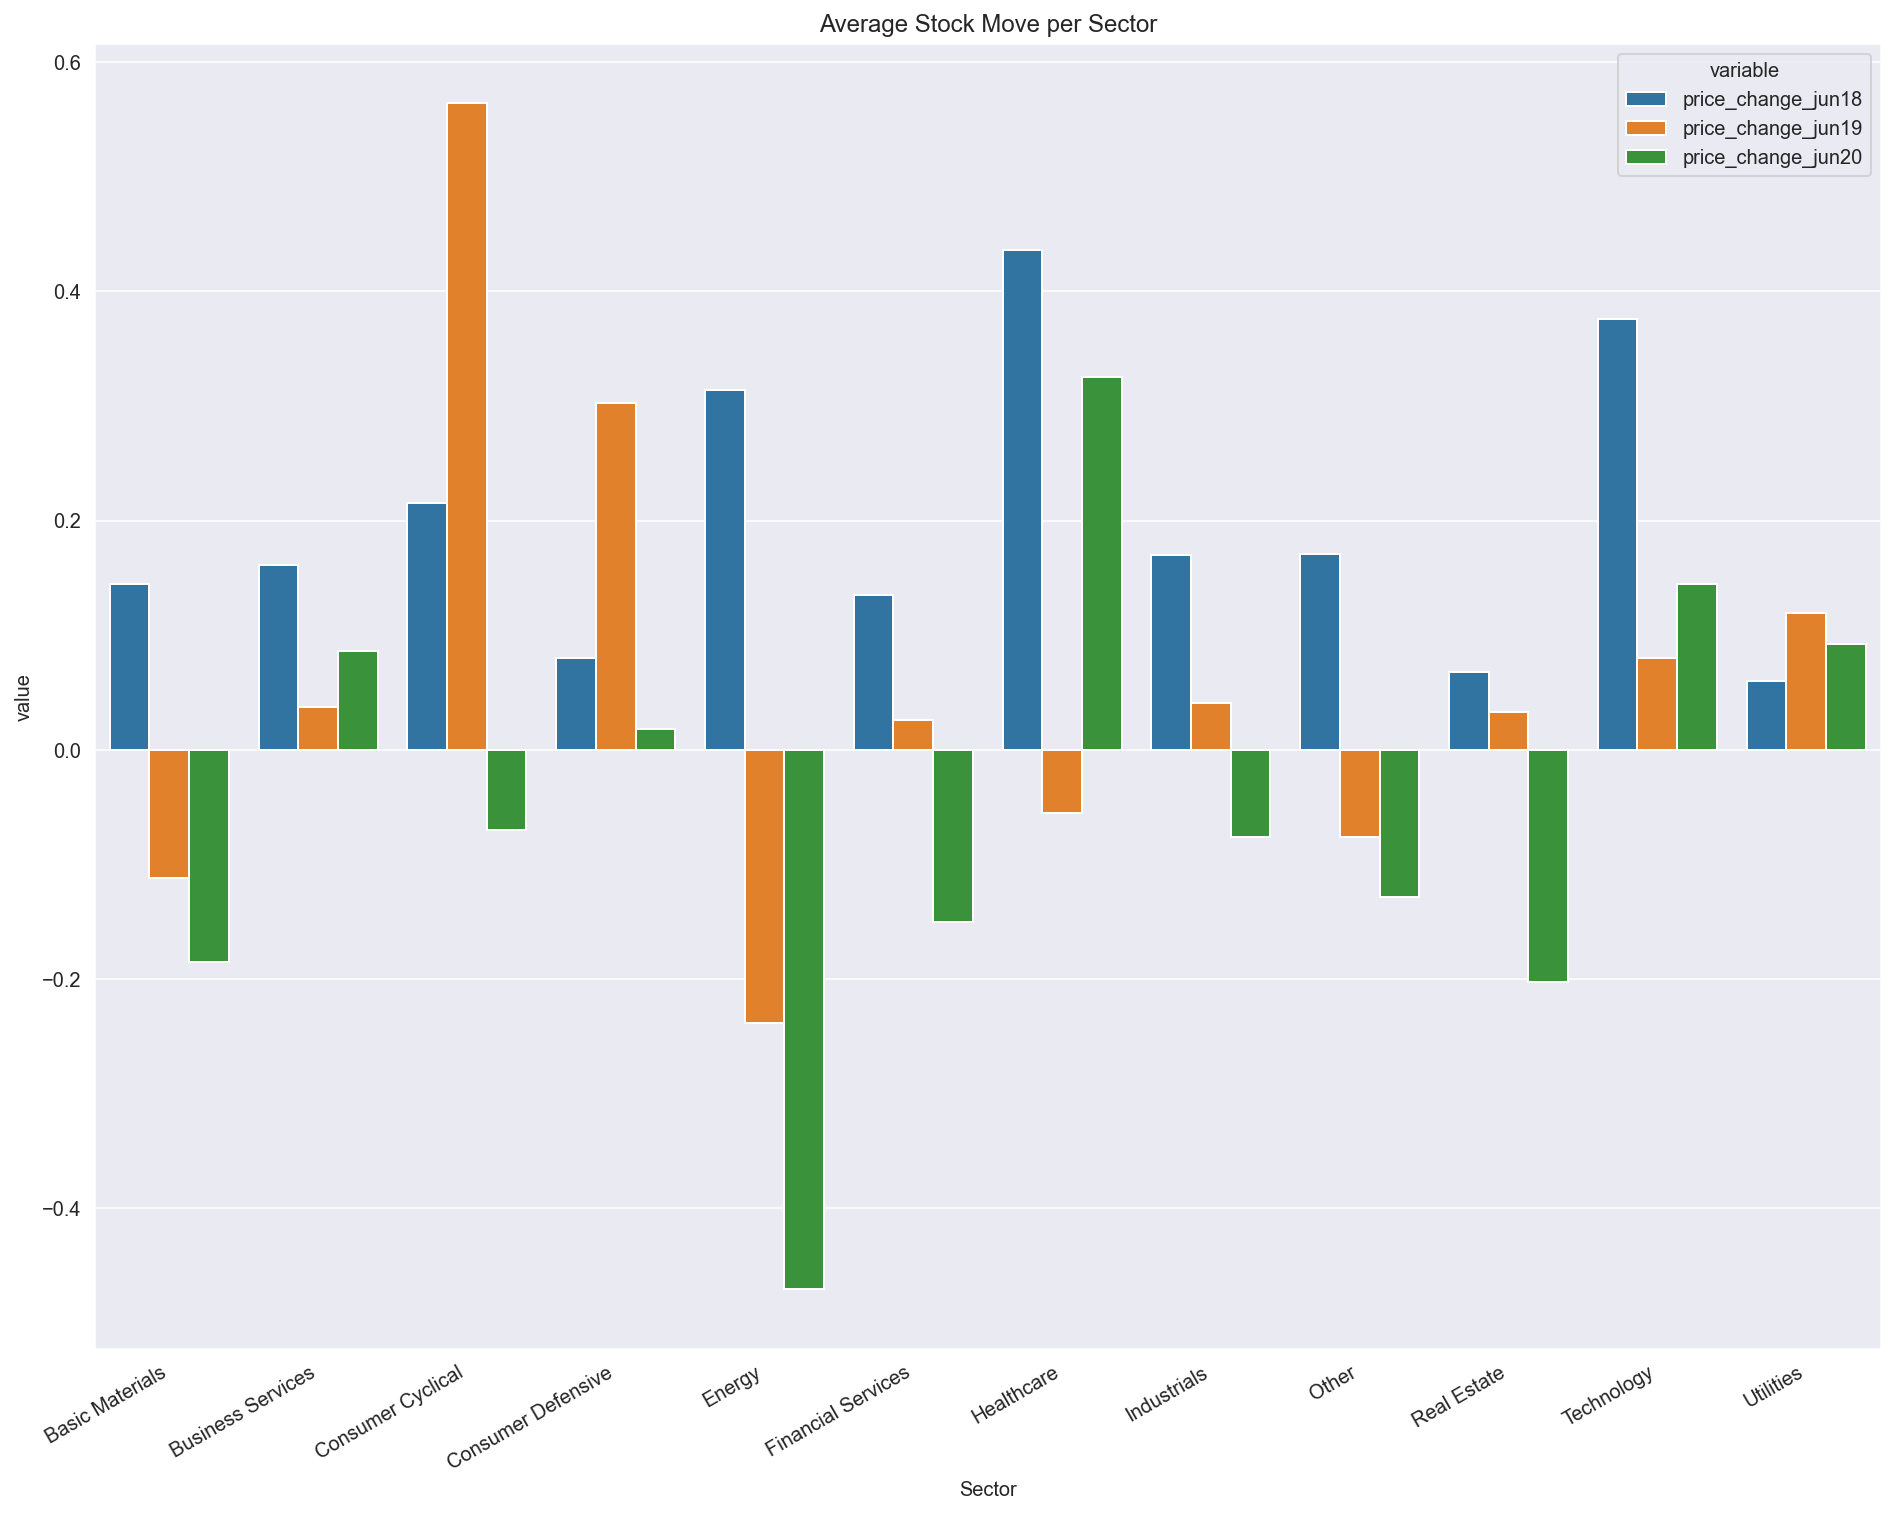

In [68]:
plt.figure(figsize=(16,12))
sns.barplot(data=sector_change_graph,x='Sector',y='value',hue = 'variable')
plt.xticks(rotation=30,ha='right')
plt.title("Average Stock Move per Sector")
plt.show()

In [22]:
industry_perf = df_all.groupby('Industry').mean()[['price_change_jun18','price_change_jun19','price_change_jun20','market_cap_jun20','market_cap_jun20_change']]
industry_perf.sort_values('price_change_jun20',inplace=True)
industry_perf.reset_index(inplace=True)
industry_perf.head()

,Industry,price_change_jun18,price_change_jun19,price_change_jun20,market_cap_jun20,market_cap_jun20_change
0,Coal,-0.101116,-0.021124,-0.727213,2.223017e+08,-6.005352e+08
1,Oil & Gas - Drilling,0.232644,-0.363235,-0.675870,1.290411e+09,-2.662742e+09
2,Oil & Gas - Services,0.559444,-0.244866,-0.545232,3.265725e+09,-3.394527e+09
3,Oil & Gas - E&P,0.307264,-0.380680,-0.482176,5.635786e+09,-4.471192e+09
4,Airlines,-0.096341,0.089495,-0.467556,7.235718e+09,-6.592707e+09


Text(0.5, 1.0, 'Industries Avg Stock Price change Jun19-Jun20')

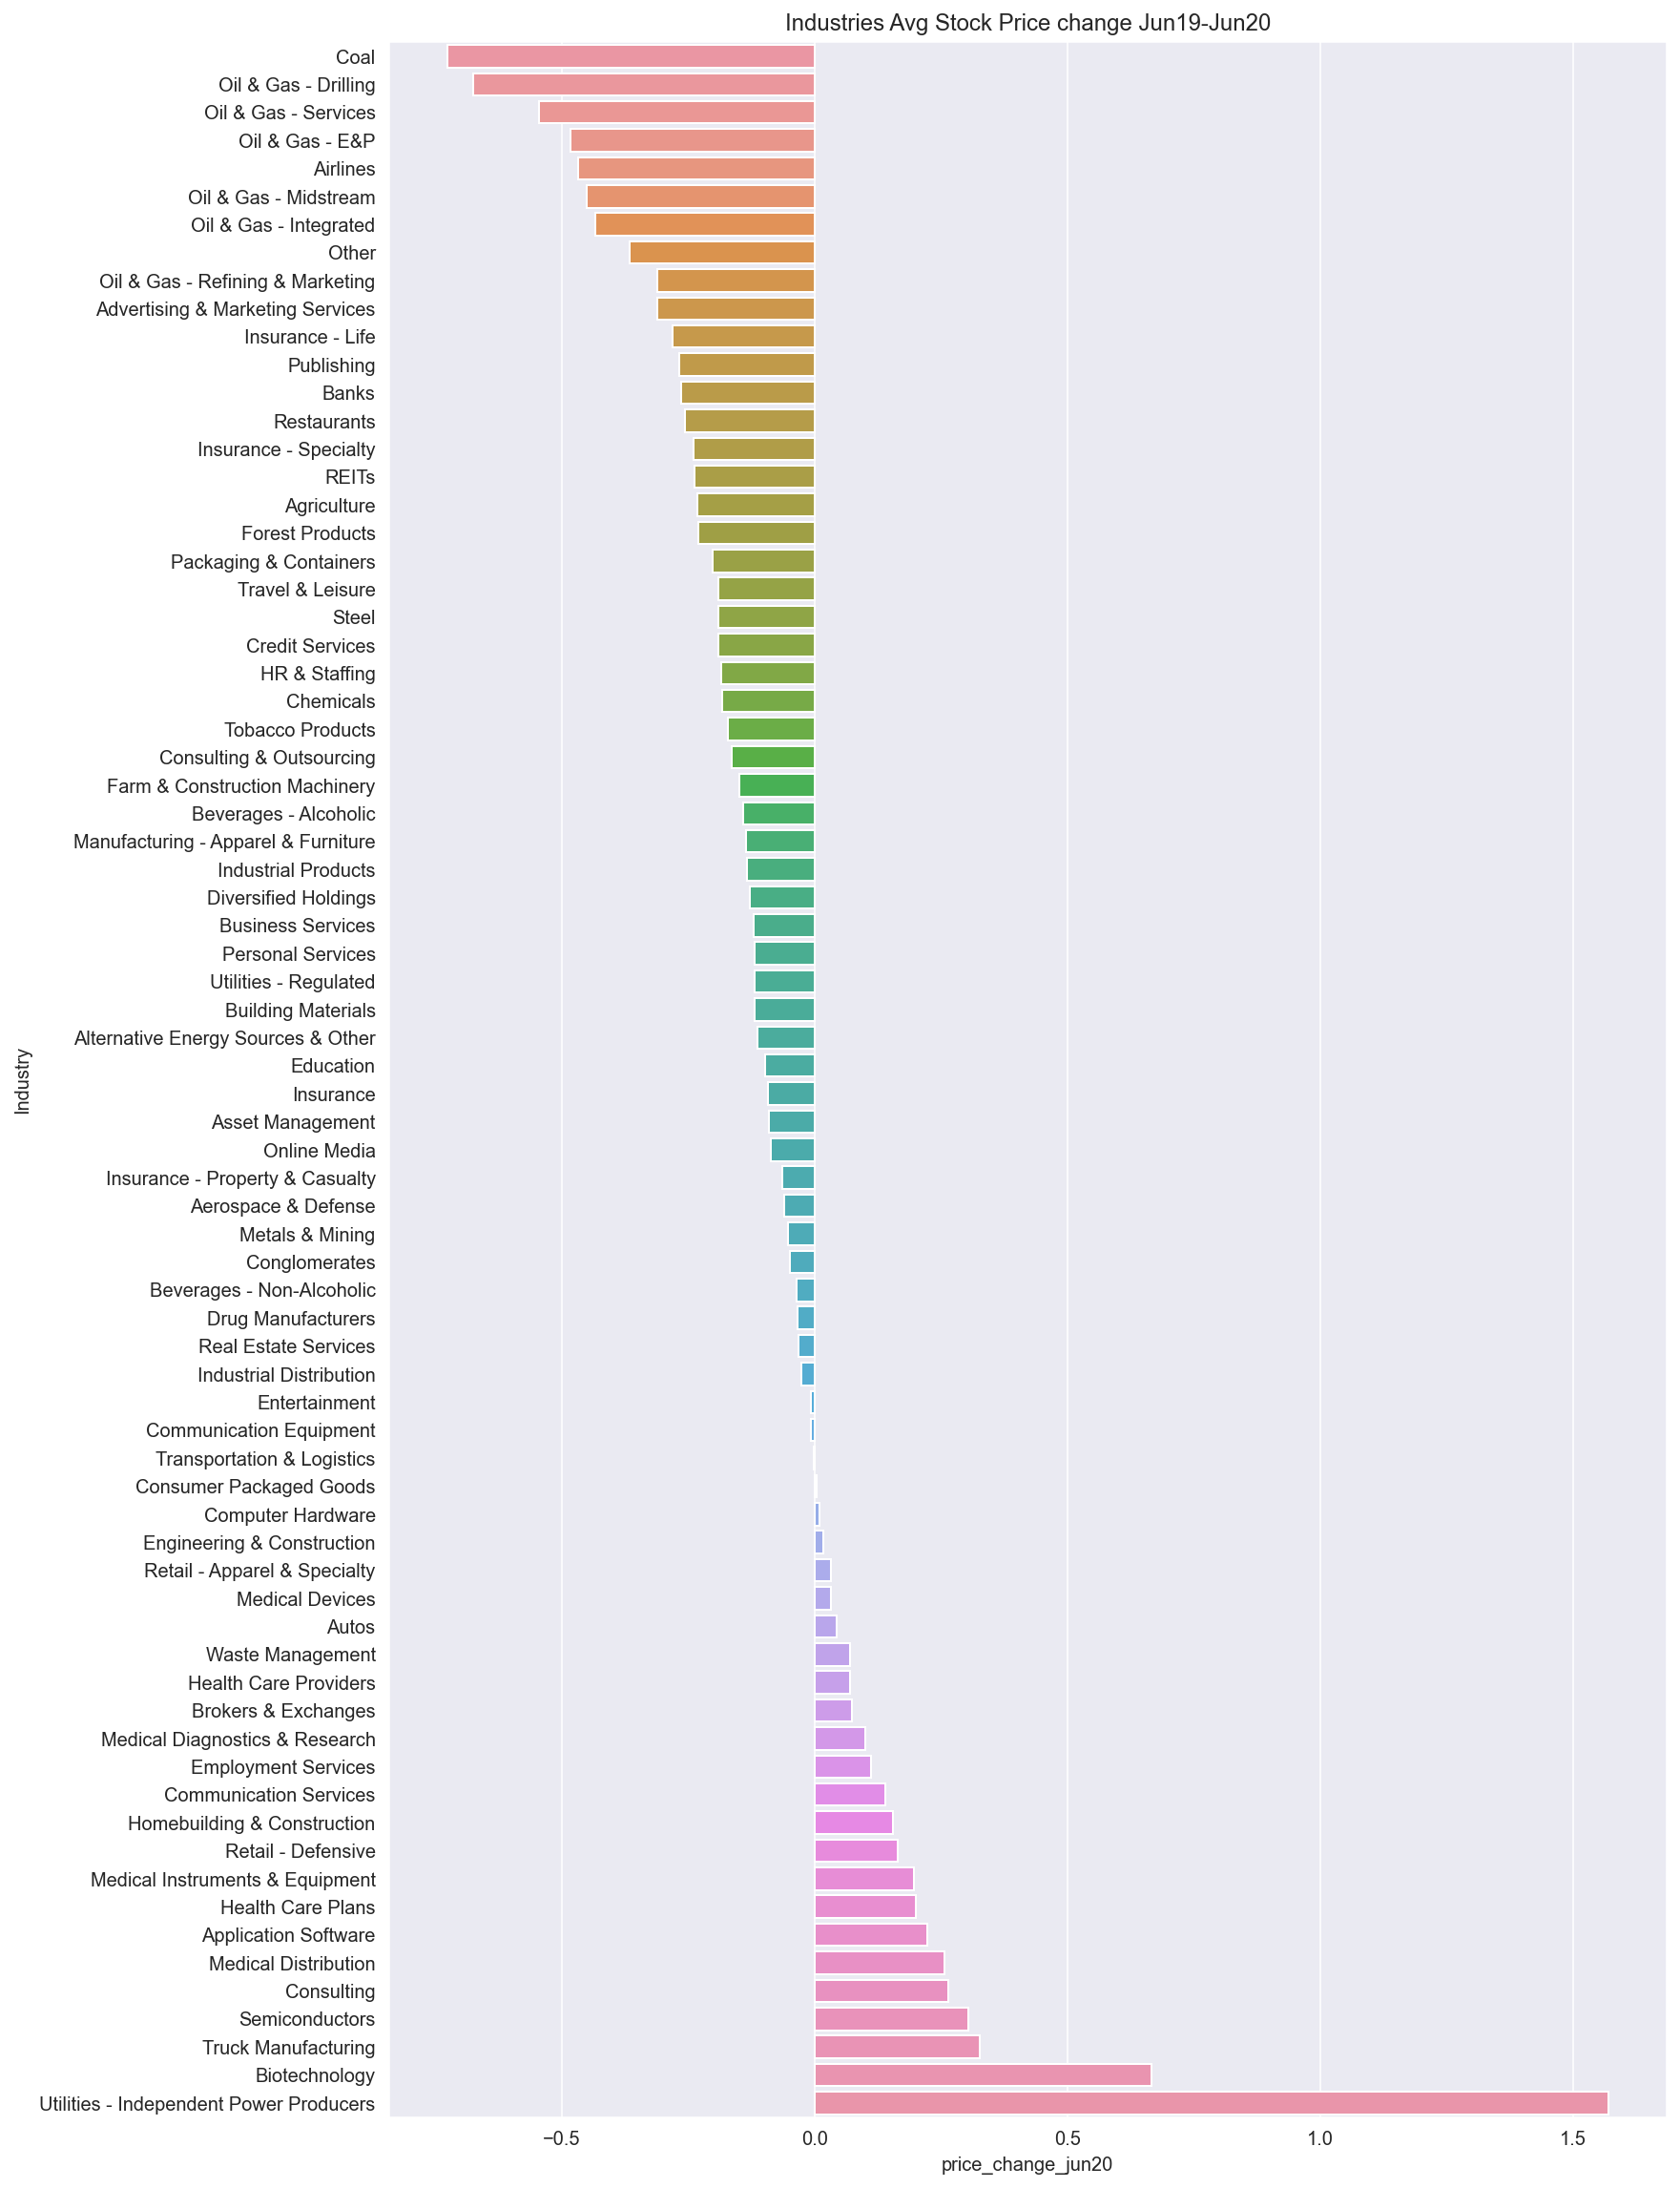

In [76]:
plt.figure(figsize=(12,20))
sns.barplot(data=industry_perf,x='price_change_jun20',y='Industry')
plt.title("Industries Avg Stock Price change Jun19-Jun20")